<a href="https://colab.research.google.com/github/nsmsm/ASL/blob/master/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import cifar10
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input

import numpy as np

In [ ]:
## load cifar data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train.shape)
y_train = np.squeeze(y_train)
print(y_train.shape)

(50000, 1)
(50000,)


(50000, 75, 75, 3)


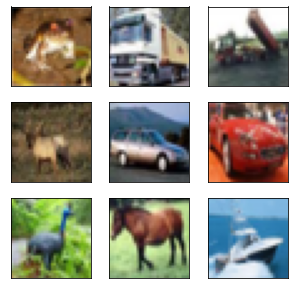

(10000, 75, 75, 3)


0

In [ ]:
import tensorflow as tf
import gc
import matplotlib.pyplot as plt

## resize the cifar data
## from 32*32*3 to 75*75*3
train_images = tf.constant(x_train, dtype=tf.float32)
big_train_x = tf.image.resize(train_images, [75,75]).numpy()
print(big_train_x.shape)

## plot images
plt.figure(figsize=(5,5))
for col1 in range(9):
  plt.subplot(3,3,col1+1)
  plt.imshow(train_images[col1]/255.)
  plt.xticks([])
  plt.yticks([])
plt.show()

del x_train, train_images  ## delete the redundant variables
gc.collect()               ## free memory

test_images = tf.constant(x_test, dtype=tf.float32)
big_test_x = tf.image.resize(test_images, [75,75]).numpy()
print(big_test_x.shape)
del x_test, test_images
gc.collect()

In [ ]:
## pre-process train and test data
big_train_x = preprocess_input(big_train_x)
big_test_x = preprocess_input(big_test_x)
print(big_train_x.shape)
print(big_train_x[0])

(50000, 75, 75, 3)
[[[-0.5372549  -0.5137255  -0.5058824 ]
  [-0.5548235  -0.5312941  -0.52564704]
  [-0.608366   -0.5848366  -0.58588237]
  ...
  [ 0.17856205 -0.02300656 -0.19660127]
  [ 0.16517651 -0.02635294 -0.19325489]
  [ 0.16078436 -0.02745098 -0.19215685]]

 [[-0.5844706  -0.5598432  -0.5530981 ]
  [-0.6020392  -0.57802665 -0.5731702 ]
  [-0.6555817  -0.6334431  -0.6343425 ]
  ...
  [ 0.14565754 -0.0667451  -0.25084442]
  [ 0.13555133 -0.06774902 -0.24468708]
  [ 0.13223529 -0.06807846 -0.24266666]]

 [[-0.728366   -0.7003922  -0.69699347]
  [-0.74593467 -0.7204497  -0.7180026 ]
  [-0.7994771  -0.78157735 -0.7820305 ]
  ...
  [ 0.0453769  -0.20004356 -0.41615683]
  [ 0.04526532 -0.19390851 -0.40143263]
  [ 0.04522872 -0.19189543 -0.39660132]]

 ...

 [[ 0.40156865  0.10718954 -0.17908484]
  [ 0.39293075  0.09009671 -0.22315276]
  [ 0.36660564  0.0380044  -0.35745507]
  ...
  [-0.12388647 -0.37902373 -0.5810716 ]
  [-0.19103765 -0.4337932  -0.59847295]
  [-0.21307158 -0.4517644

In [ ]:
## load inceptionV3 model
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

In [ ]:
## extract the penultimate features
## train data
train_features = model.predict(big_train_x)
print(train_features.shape)
train_features = np.squeeze(train_features)
print(train_features.shape)

## test data
test_features = model.predict(big_test_x)
print(test_features.shape)
test_features = np.squeeze(test_features)
print(test_features.shape)

del model, big_train_x, big_test_x
gc.collect()

(50000, 1, 1, 2048)
(50000, 2048)
(10000, 1, 1, 2048)
(10000, 2048)


14709

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


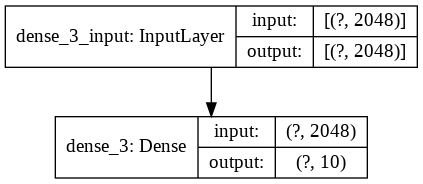

In [ ]:
multi_logistic_model = models.Sequential([
  Dense(10, activation='softmax', input_shape=(2048,))]
)
multi_logistic_model.summary()

plot_model(multi_logistic_model, show_shapes=True)

In [ ]:
multi_logistic_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=multi_logistic_model.fit(train_features, y_train, epochs=20, batch_size=100, validation_split=0.10)

Epoch 1/20
450/450 [==============================] - 1s 3ms/step - loss: 1.2963 - accuracy: 0.5597 - val_loss: 1.1092 - val_accuracy: 0.6206
Epoch 2/20
450/450 [==============================] - 1s 3ms/step - loss: 1.0347 - accuracy: 0.6468 - val_loss: 1.0793 - val_accuracy: 0.6332
Epoch 3/20
450/450 [==============================] - 1s 3ms/step - loss: 0.9764 - accuracy: 0.6643 - val_loss: 1.0714 - val_accuracy: 0.6336
Epoch 4/20
450/450 [==============================] - 1s 3ms/step - loss: 0.9436 - accuracy: 0.6757 - val_loss: 1.0520 - val_accuracy: 0.6434
Epoch 5/20
450/450 [==============================] - 1s 3ms/step - loss: 0.9227 - accuracy: 0.6839 - val_loss: 1.0666 - val_accuracy: 0.6368
Epoch 6/20
450/450 [==============================] - 1s 3ms/step - loss: 0.9048 - accuracy: 0.6895 - val_loss: 1.0627 - val_accuracy: 0.6386
Epoch 7/20
450/450 [==============================] - 1s 3ms/step - loss: 0.8919 - accuracy: 0.6911 - val_loss: 1.0958 - val_accuracy: 0.6304
Epoch 

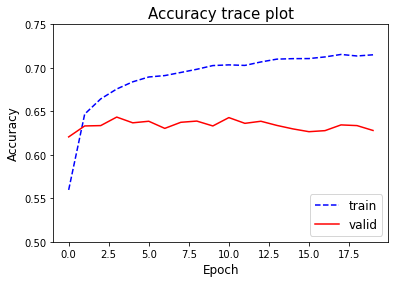

313/313 [==============================] - 1s 3ms/step - loss: 1.1356 - accuracy: 0.6329
...accuracy: 0.633, loss: 1.136


In [ ]:
plt.plot(hist.history['accuracy'], 'b--', label='train')
plt.plot(hist.history['val_accuracy'], 'r-', label='valid')
plt.ylim([0.5,0.75])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = multi_logistic_model.evaluate(test_features, y_test)
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))